##<b>Problem Definition</b>
**The context:**
- Malaria is a very contagious disease caused by parasites transmitted by female Anopheles mosquitoes.
- These parasites can target the human blood cells and cause fatal damage to respiratory systems and other complications.
- The disease can be undetected for over a year, and late treatment can prove fatal. The disease can be detected via images of human red blood cells.
- Because of this, early diagnosis can be life saving, and new techniques like ones based on deep learning can be very helpful and provide scientific and medical value (Great Learning, 2021).
Source: Great Learning, 2021. Capstone Project: Malaria Detection. Retreived on: January 5th 2021.
<br>
**The objectives:** 
- This project aims to create a Deep Learning model which provides high malaria detection accuracy via analysis of human red blood cells.
- The model has to have a good level of interpretation so that medical professionals can analyze it and understand what is going on with the detection.
- The model also has to have very high accuracy, as both false positives and false negatives can be very costly. We want to reduce misclassification rate.
- Provide scientific and medical value to the field.<br>
**The key questions:**
- Which parameters in red blood cell images are useful for malaria detection?
- Do Deep Learning techniques provide enough accuracy to be considered an improvement over manual detection?
- Can Data Science, Machine Learning and Artificial Intelligence techniques provide medical and scientific value in the medicine field?<br>
**The problem formulation:** Manual methods for Malaria detection can be highly inaccurate and represent a significant time cost, there is a need to create more efficient, accurate, and automatized detection methods.

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

###<b> Mounting the Drive

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b>Loading libraries</b>

In [ ]:
#Importing libraries required to load the data

import zipfile
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU, GlobalAvgPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
#Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/MalariaDetection/cell_images.zip'

#The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

The files have been extracted to the local session of Google Colab. The extracted folder would have the following structure:

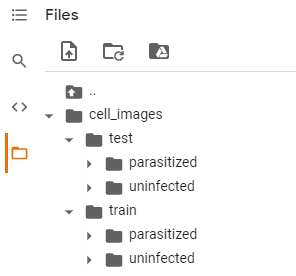

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
#Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

#Size of image so that each image has the same size
SIZE = 64

#Empty list to store the training images after they are converted to NumPy arrays
train_images = []

#Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            #Resizing each image to (224,224)
            image = image.resize((SIZE, SIZE))

            #Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                train_labels.append(1)
            else:
                train_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
#Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

#Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

#Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

#Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
#We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    #Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):
        try:
            #Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            #Resizing each image to (128,128)
            image = image.resize((SIZE, SIZE))
            
            #Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            #Creating labels for parasitized and uninfected images
            if folder_name=='/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       

#Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)
original_train_labels=train_labels

###<b> Checking the shape of train and test images

In [ ]:
# shape of images
print("Shape of train data: ", train_images.shape)
print("Shape of test data: ", test_images.shape)

Shape of train data:  (24958, 64, 64, 3)
Shape of test data:  (2600, 64, 64, 3)


###<b> Checking the shape of train and test labels

In [ ]:
# shape of labels
print("Shape of train labels: ", train_labels.shape)
print("Shape of test labels: ", test_labels.shape)
print("First train label: ", train_labels[0])
print("First test label: ", test_labels[0])

Shape of train labels:  (24958,)
Shape of test labels:  (2600,)
First train label:  1
First test label:  1


#####<b> Observations and insights: ####
- There are the same number of images as labels.
- The images can be seen as the input of a system, and the labels of each image as the classification of them.
- Every imagen can be either a 1 (parasitized) or 0 (uninfected). This is what the labels mean, they tell us if an image corresponds to a parasatized patient or uninfected.
- Slightly over 90% of the images and labels are train data, while the rest is test.
- The images have a shape of 64, 64 3. This means each image has a size of 64x64, with 3 different channels per image.
- We can eventually train a CNN by using our images and labels. 


### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# try to use min and max function from numpy
print("Minimum pixel: ", np.min(train_images))
print("Maximum pixel: ", np.max(test_images))

Minimum pixel:  0
Maximum pixel:  255


#####<b> Observations and insights:
The pixels of each image go from 0 to 255. This number represents intensity of each pixel. Each image has 3 channels, and every pixel of every channel has a certain intensity that goes from 0 to 255. This combination of pixel intensity and channel lets us represent an image and its colors in a numerical way.



###<b> Count the number of values in both uninfected and parasitized 

In [ ]:
# try to use value_counts to count the values
trainDataDictionary={"image":train_images,
                     "label": train_labels}
print("Train data: ")
train_labels_df=pd.DataFrame({"column1":train_labels })
train_labels_df["column1"].replace(to_replace={1:"parasitized", 0:"uninfected"}, inplace=True)
print(train_labels_df)
print(train_labels_df.value_counts())
test_labels_df=pd.DataFrame(test_labels)
test_labels_df.value_counts()
print("Test data: ")
test_labels_df=pd.DataFrame({"column1":test_labels })
test_labels_df["column1"].replace(to_replace={1:"parasitized", 0:"uninfected"}, inplace=True)
print(test_labels_df)
test_labels_df.value_counts()


Train data: 
           column1
0      parasitized
1      parasitized
2      parasitized
3      parasitized
4      parasitized
...            ...
24953   uninfected
24954   uninfected
24955   uninfected
24956   uninfected
24957   uninfected

[24958 rows x 1 columns]
column1    
uninfected     12479
parasitized    12479
dtype: int64
Test data: 
          column1
0     parasitized
1     parasitized
2     parasitized
3     parasitized
4     parasitized
...           ...
2595   uninfected
2596   uninfected
2597   uninfected
2598   uninfected
2599   uninfected

[2600 rows x 1 columns]


column1    
uninfected     1300
parasitized    1300
dtype: int64

###<b>Normalize the images

In [ ]:
# try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')
test_images = (test_images/255).astype('float32')

#####<b> Observations and insights: 
- There are the same number of labels as images, so we can tell how many parasitized and uninfected images we have.
- In both the train and test data, we have an even split of cases: 50% parasatized images and 50% uninfected. This is good, as if we had almost no cases of one category, making a precise model that could accurately predict this rare case would be more difficult, and we would have to adjust more hyperparameters. Both types of errors would be very costly, false positives could be costly treatment for both patients and doctors (and maybe complications because of medication side effects), and false negatives (diagnosing a patient as uninfected when they do in fact have malaria) could cost the patient gravely and maybe even fatally. We have to train a model which contemplates both cases.
- We divided the pixel values by 255, as pixels in each channel went to a value of 255 as maximum. This allows us to work with normalized data.

###<b> Plot to check if the data is balanced

Train data:
Test data:


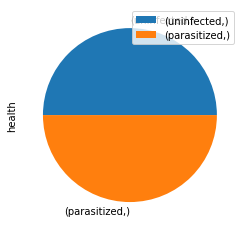

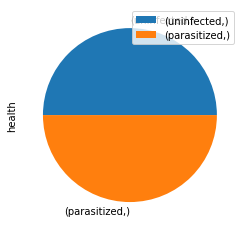

In [ ]:
# you are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced
print("Train data:")
pd.DataFrame({"health":train_labels_df.value_counts()}).plot.pie(y="health")
print("Test data:")
pd.DataFrame({"health":test_labels_df.value_counts()}).plot.pie(y="health")

#####<b> Observations and insights:
- As seen previously, there is an even split between infected and uninfected patients. 
- This is very good, as if we had data with almost no infected cases, there would be more bias towards one classification. Both misclassification errors are very costly in this case, and could cost patients their life. If this was the case, we would have to do more hyperparameter adjusting and the model would not be as precise.
- Both train and test data have an even split.

### <b>Data Exploration</b>
Let's visualize the images from the train data

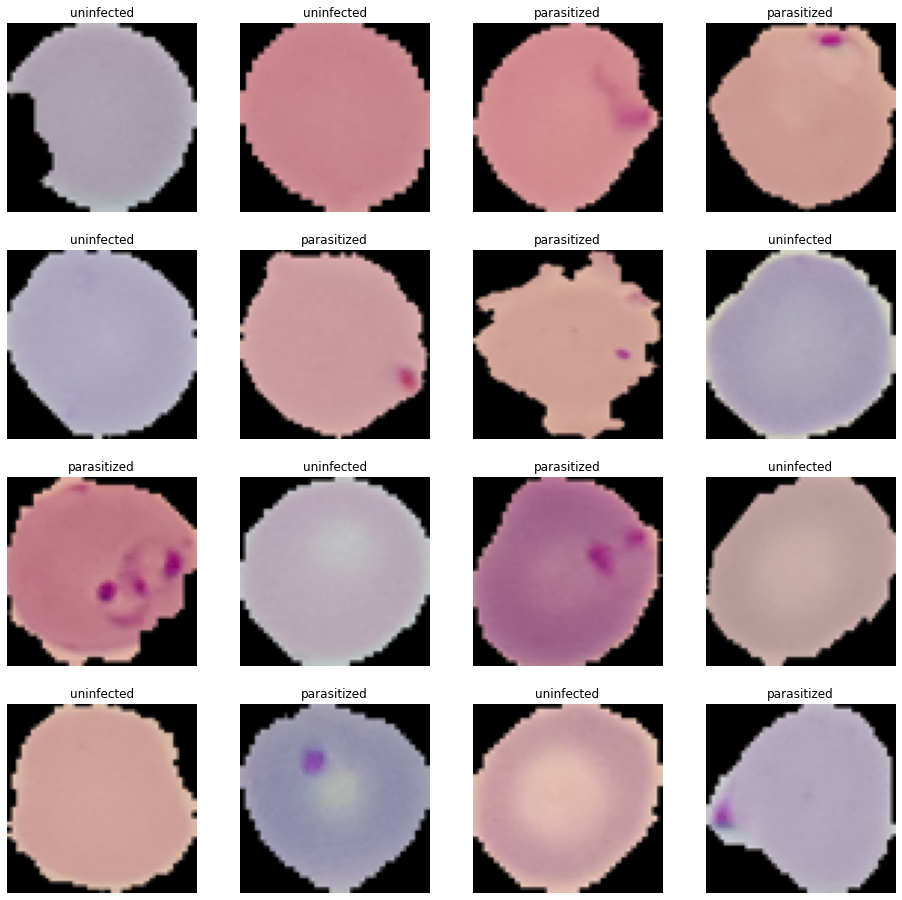

In [ ]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)
plt.figure(1 , figsize = (16 , 16))

for n in range(1, 17):
    plt.subplot(4, 4, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(train_images[index])
    plt.axis('off')

#####<b> Observations and insights:
- There is a clear difference between parasitized and uninfected patients. Uninfected cells look almost "clean", while parasitized images have a clear distinct pattern.
- The "marks" on parasatized cells can be found in different shapes and places of the cells. The cells themselves also have different shapes, even if all the images are 64x64. 
- Since the infected patterns are in different places, we want a translationally invariant model that considers spatial localities. A CNN could be a great model for this, compared to a fully connected neural network.

###<b> Similarly visualize the images with subplot(6,6) and figsize=(12,12)

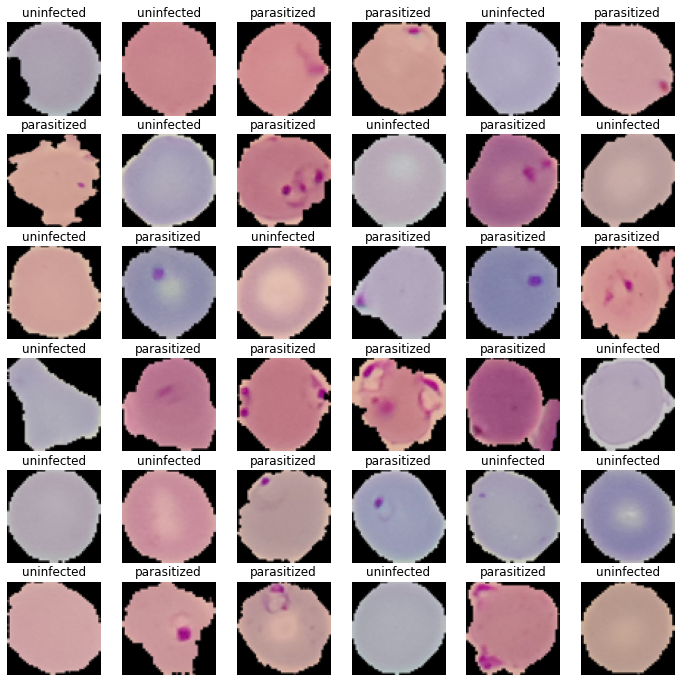

In [ ]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)
plt.figure(1 , figsize = (12 , 12))

for n in range(1, 37):
    plt.subplot(6, 6, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(train_images[index])
    plt.axis('off')

#####<b>Observations and insights:
- Thanks to having more data to draw from, we can confirm our previous conclusions even more.
- Again, several cell images have a different shape, like the 35th image. The parasitized "marks" are also in different intensities and localities in every cell.
- Because of this, we want a model which takes all of these differences into account, as said previously.

###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
# function to find the mean
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]
    # reshape it back to a matrix
    plt.imshow(mean_img)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

<b> Mean image for parasitized

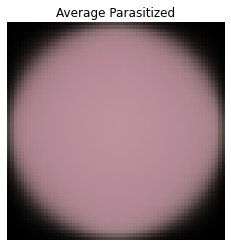

In [ ]:
# If the label=1 then the image is parasitised and if the label=0 then the image is uninfected
parasitized_data=[]                                # Create a list to store the parasitized data
for img, label in zip(train_images, train_labels):
        if label==1:
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean


<b> Mean image for uninfected

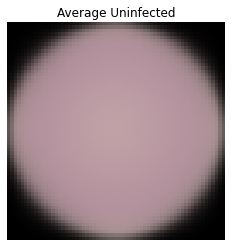

In [ ]:
# Similarly write the code to find the mean image of uninfected

# If the label=1 then the image is parasitised and if the label=0 then the image is uninfected
uninfected_data=[]                                # Create a list to store the uninfected data
for img, label in zip(train_images, train_labels):
        if label==0:
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean


#####<b> Observations and insights:
- Both average images look very similar to each other, with the average parasitized perhaps having a bit of a purple tint.
- This tint could be explained by the purple stains that all the infected cells have.
- The similarities between both, and the fact that the average looks like a regular cell, could be explained by the fact that the parasitized purple stains are in different places for almost every cell (as well as these stains having different shapes and hues). Some have them in the top left corner, others in the middle, and every possible position. This makes it so the average image averages out every stain position and it looks like a normal cell with a slightly purple tint. 

### <b>Converting RGB to HSV of Images using OpenCV

####<b> Converting the train data

In [ ]:
import cv2
gfx=[]   # to hold the HSV image array
for i in np.arange(0,100,1):
  a=cv2.cvtColor(train_images[i],cv2.COLOR_BGR2HSV)
  gfx.append(a)
gfx=np.array(gfx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


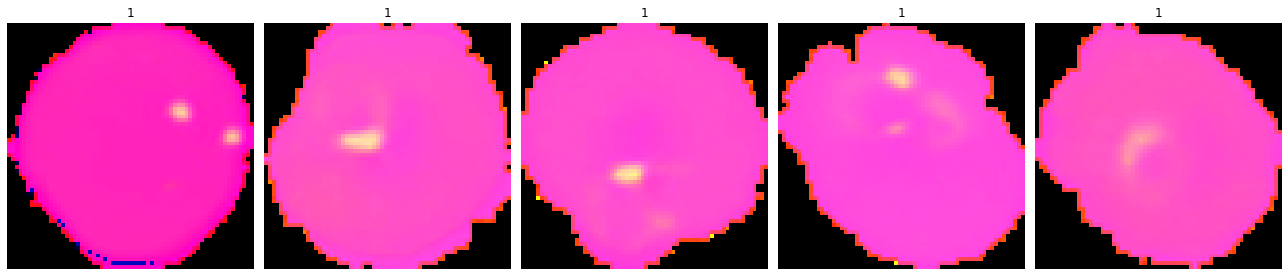

In [ ]:
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

####<b> Converting the test data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


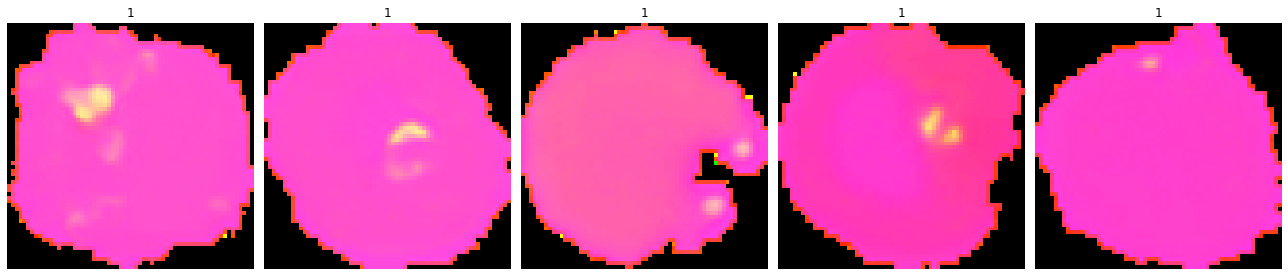

In [ ]:
# Similarly you can visualize for the images in the test data
gfx_test=[]   # to hold the HSV image array
for i in np.arange(0,100,1):
  a=cv2.cvtColor(train_images[i],cv2.COLOR_BGR2HSV)
  gfx_test.append(a)
gfx_test=np.array(gfx_test)
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gfx_test[i])
  ax[t].set_axis_off()
  fig.tight_layout()

#####<b>Observations and insights: 
- In the parasitized images we just saw, we can clearly tell the parasitized cells pattern.
- Compared to RBG, these HSV images have yellow stains instead of purple. But they are still very clear to see.
- Keeping all images can be very helpful for data augmentation: different variations of images like HSV or gaussian blurring (as well as other techniques) can help us go through a very helpful process of data augmentation. This is also very useful for the data exploration part of our project.

###<b> Processing Images using Gaussian Blurring

####<b> Gaussian Blurring on train data

In [ ]:
gbx=[]  ## to hold the blurred images
for i in np.arange(0,100,1):
  b= cv2.GaussianBlur(train_images[i], (5, 5), 0)
  gbx.append(b)
gbx=np.array(gbx)

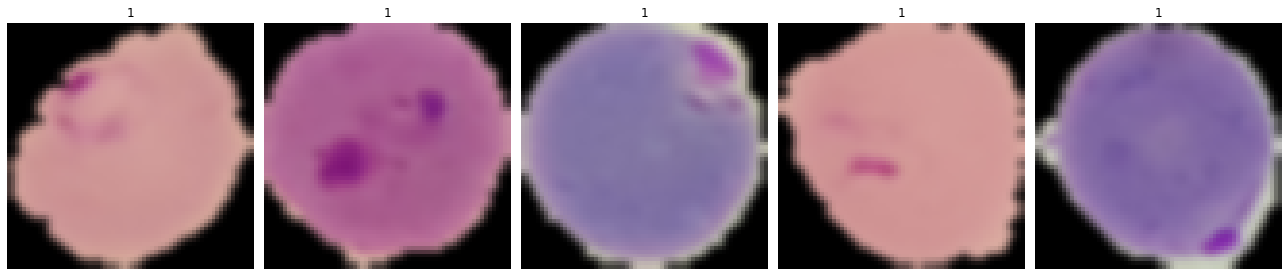

In [ ]:
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gbx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

####<b> Gaussian Blurring on test data

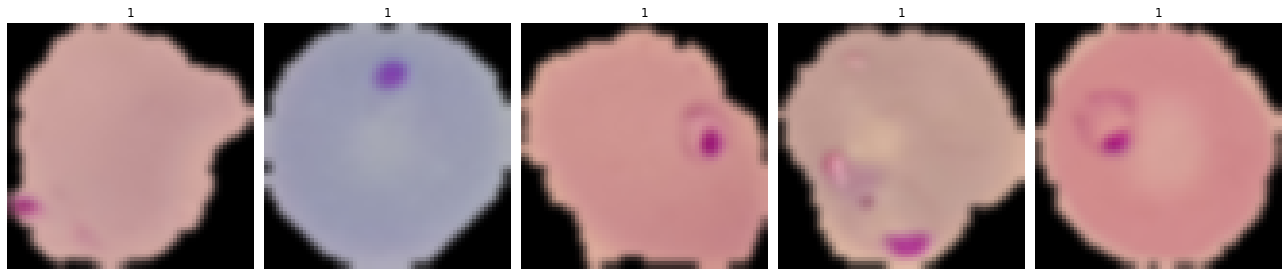

In [ ]:
# Similarly you can apply Gaussian blurring for the images in the test data
gbx_test=[]  ## to hold the blurred images
for i in np.arange(0,100,1):
  b= cv2.GaussianBlur(test_images[i], (5, 5), 0)
  gbx_test.append(b)
gbx_test=np.array(gbx_test)
viewimage=np.random.randint(1,100,5)
fig,ax=plt.subplots(1,5,figsize=(18,18))
for t,i in zip(range(5),viewimage):
  Title=train_labels[i]
  ax[t].set_title(Title)
  ax[t].imshow(gbx_test[i])
  ax[t].set_axis_off()
  fig.tight_layout()

#####**Observations and insights: _____**
- Once again, the parasitized images and stains are very clear to see here. It is a bit harder to identify them in some cells, like the last image of our train data plot.
- Again, blurring can still help this problem statement by helping us with data augmentation, just like HSV. These image transformations are very useful for having more helpful data.
- We can try using more techniques like image rotation, scaling, padding, and others. This can help with our data augmentation case.

## **Proposed approach**

**Potential techniques:** What different techniques should be explored?<br>
**Overall solution design:** What is the potential solution design?<br>
**Measures of success:** What are the key measures of success to compare different techniques?<br>

**Potential Techniques:**
- We want to have a model that considers spatial localities and is translationally invariant. This is because our parasitized images have a taint that lets us know they have malaria, but this taint can be in very different shapes, hues and positions. So we have to take that into account.
- Because of this, artificial neural networks will not work as well. We also have a lot of parameters because of the multiple channels and dimensions, this cannot be as optimal with ANNs.
- Because of all these points, we want to use Convolutional Neural Networks. These will allow us to take spatial localities into account and have a translationally invariant model. CNNs also filter and use parameters and inputs in a more optimal way than ANNs when it comes to image recognition, making a more efficient model.
- CNNs are not great for recognizing rotated images. A laboratory might upload slightly rotated images, and we have to take this into account. A good solution for this weakness is data augmentation. Training the model with different image transformations such as HSV, gaussian blurring, rotation, scaling and padding, can help mitigate this weakness and create a more robust CNN model.

**Overall Solution Design:**
- We want to create a CNN which is as efficient as possible. The CNN has to be translationally irrelevant and optimal in parameters utilized. This will allow it to rightly identify malaria despite different positions of the cells.
- Our CNN model has to be robust against rotation and positioning. We want to use data augmentation techniques to have a model as robust as possible. If possible, transfer learning could also be very useful.
- We will have to optimize our CNN as much as possible. We will have to consider activation function layers, convolutional filter layers, and pooling layers for dimension reduction. We will have to try different model configurations and check different measures of success to choose our best model.


**Measures of Success:**
- We have to consider overfitting. To do this, when training models we will have to see val_accuracy and how close it is to training accuracy. This will let us know if our CNN is generalizing properly or has too much variance.
- Another measure of success is of course our overall accuracy. We want to have an accuracy as high as possible, as errors are very costly in this project.
- Errors are extremely costly. A false positive could mean a patient wasting money and having possible side effects from medication he doesn't need. A false negative could mean the patient's death from lack of treatment. Low accuracy in test data is a complete failure.
- We have to consider the epochs vs accuracy relation. If a model takes a lot longer for a marginally better accuracy than another, it might not be worth it. Still, in use cases as delicated (costly and fatal errors) as this, we really want to prioritize accuracy and not overfitting/underfitting/having a proper fit overy everything else.

###<B>One Hot Encoding on the train and test labels

In [ ]:
# Encoding Train Labels
train_labels=to_categorical(train_labels,2)
# Similarly let us try to encode test labels
test_labels=to_categorical(test_labels,2)

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

####<b> Importing the required libraries

In [ ]:
#Clearing backend
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the model

In [ ]:

#creating sequential model
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

####<b> Compiling the model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<b> Using Callbacks 

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b> Fit and train our Model

In [ ]:
#Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history=model.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)

Epoch 1/20
624/624 [==============================] - 21s 9ms/step - loss: 0.4236 - accuracy: 0.7992 - val_loss: 0.2650 - val_accuracy: 0.9233
Epoch 2/20
624/624 [==============================] - 5s 8ms/step - loss: 0.1696 - accuracy: 0.9392 - val_loss: 0.2168 - val_accuracy: 0.9507
Epoch 3/20
624/624 [==============================] - 5s 8ms/step - loss: 0.1592 - accuracy: 0.9449 - val_loss: 0.1378 - val_accuracy: 0.9694
Epoch 4/20
624/624 [==============================] - 5s 8ms/step - loss: 0.1502 - accuracy: 0.9489 - val_loss: 0.1611 - val_accuracy: 0.9607
Epoch 5/20
624/624 [==============================] - 5s 8ms/step - loss: 0.1447 - accuracy: 0.9511 - val_loss: 0.1583 - val_accuracy: 0.9661


####<b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 6ms/step - loss: 0.1547 - accuracy: 0.9523

 Test_Accuracy:- 0.9523077011108398


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1300
           1       0.96      0.94      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



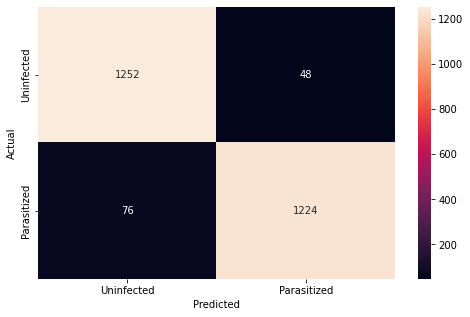

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b>Plotting the train and validation curves

In [ ]:
# function to plot train and validation accuracy 
def plot_accuracy(history):
    N = len(history.history["accuracy"])
    plt.figure(figsize=(7,7))
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy", ls='--')
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy", ls='--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

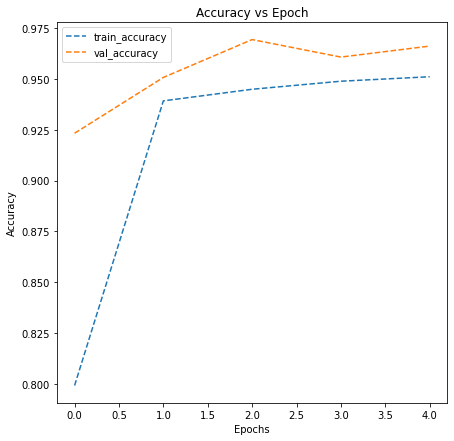

In [ ]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

**Model Observations**<br>
This model was used as a building block, with 3 convolutional layers (32 features each) to extract relevant features, 3 pooling layers to reduce dimensions of feature maps, and dropouts to prevent overfitting. The model did not take long, it is not computationally expensive. <br>
It also seems to have an accuracy of 94.53%, which is very high and could provide substantial medical value if applied.<br> The only problem is that it brought a lot more false negatives (91/1300) than false positives (51/1300). This is dangerous as it could cost lives. The model can be improved upon, but going over 94% implies a significant degree of difficulty.


###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
#Clearing backend
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the Model

In [ ]:
#creating sequential model
model1=Sequential()

# Build the model here

#creating sequential model
model1=Sequential()

# Build the model here
model1.add(Conv2D(filters=64, kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
model1.add(MaxPooling2D(pool_size=2))
#model1.add(BatchNormalization())

model1.add(Dropout(0.2))

model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
#model1.add(BatchNormalization())

model1.add(Dropout(0.2))

model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
#model1.add(BatchNormalization())

model1.add(Dropout(0.2))

model1.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
#model1.add(BatchNormalization())

model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(512,activation="relu"))
model1.add(LeakyReLU(alpha=0.1))
model1.add(Dropout(0.4))
model1.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
#making our own optimizer
adam=optimizers.Adam(learning_rate=0.001)
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)       

####<b> Compiling the model

In [ ]:
adam = optimizers.Adam(learning_rate=0.001)
model1.compile(loss="binary_crossentropy", optimizer=adam, metrics=['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b>Fit and Train the model

In [ ]:
history1=model1.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)

Epoch 1/20
624/624 [==============================] - 8s 11ms/step - loss: 0.3528 - accuracy: 0.8379 - val_loss: 0.1623 - val_accuracy: 0.9567
Epoch 2/20
624/624 [==============================] - 6s 10ms/step - loss: 0.1637 - accuracy: 0.9469 - val_loss: 0.2056 - val_accuracy: 0.9545
Epoch 3/20
624/624 [==============================] - 6s 10ms/step - loss: 0.1537 - accuracy: 0.9514 - val_loss: 0.1279 - val_accuracy: 0.9655
Epoch 4/20
624/624 [==============================] - 6s 10ms/step - loss: 0.1474 - accuracy: 0.9538 - val_loss: 0.1321 - val_accuracy: 0.9694
Epoch 5/20
624/624 [==============================] - 6s 10ms/step - loss: 0.1447 - accuracy: 0.9528 - val_loss: 0.1719 - val_accuracy: 0.9597


####<b> Evaluating the model

In [ ]:
accuracy = model1.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 6ms/step - loss: 0.1555 - accuracy: 0.9515

 Test_Accuracy:- 0.9515384435653687


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1300
           1       0.96      0.95      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



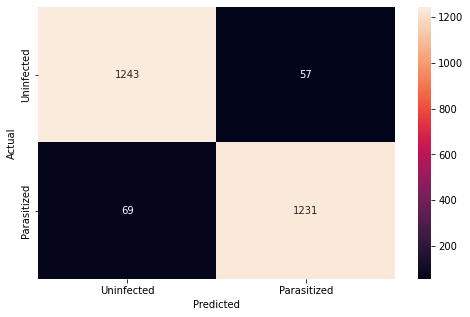

In [ ]:
pred = model1.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)

#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b> Plotting the Train and validation curves

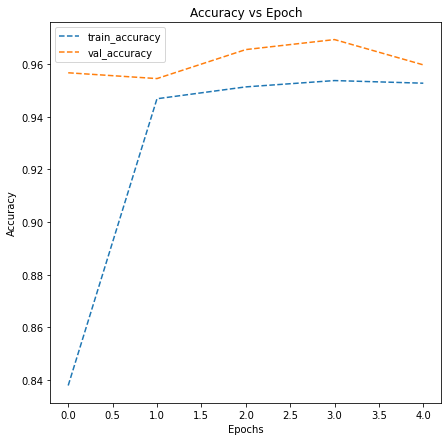

In [ ]:
plot_accuracy(history1)

**Model Observations:**<br>
The second model is very similar to the first, while adding more filters in the convolutional layers and having more of these layers. It has an accuracy of 95.42%, meeting the goal of 95%. <br>
The fit seems to be good, as validation and train accuracy both seem to be performing well. False negatives also dropped to 74/1300. <br>It is computationally more expensive than the first one, but the increase in accuracy is worth it. This model could provide substantial medical value and be lifesaving.
<br>
We can test batch normalization to standarize layer inputs as the network is getting very deep. We can also test LeakyReLU activation function as it could learn faster and provide a better model. 
<br> However, even if those solutions do not add much, this model is very powerful.

###<b> Model 2 with Batch Normalization

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Building the Model

In [ ]:
model2 = Sequential()
model2.add(Conv2D(64, (3,3), input_shape=(64, 64, 3), padding='same'))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))

model2.add(BatchNormalization())


model2.add(Conv2D(64, (3,3), padding="same"))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(BatchNormalization())

model2.add(Dropout(0.2))

model2.add(Conv2D(32, (3,3), padding="same"))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(BatchNormalization())

model2.add(Dropout(0.2))

model2.add(Conv2D(64, (3,3), padding="same"))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(BatchNormalization())

model2.add(Dropout(0.2))

model2.add(Conv2D(32, (3,3), padding="same"))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=2))
model2.add(BatchNormalization())

model2.add(Dropout(0.2))

model2.add(Flatten())

model2.add(Dense(512,activation="relu"))
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dropout(0.3))
model2.add(Dense(2,activation="sigmoid"))#2 represent output layer neurons 

model2.summary()

adam = optimizers.Adam(learning_rate=0.001)

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0

####<b>Compiling the model

In [ ]:
model2.compile(loss="binary_crossentropy", optimizer=adam, metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b>Fit and train the model

In [ ]:
history2 = model2.fit(train_images,train_labels,batch_size=32,callbacks=callbacks,validation_split=0.2,epochs=20,verbose=1)

Epoch 1/20
624/624 [==============================] - 10s 14ms/step - loss: 0.2921 - accuracy: 0.8714 - val_loss: 0.0334 - val_accuracy: 0.9924
Epoch 2/20
624/624 [==============================] - 8s 13ms/step - loss: 0.1518 - accuracy: 0.9487 - val_loss: 0.1219 - val_accuracy: 0.9724
Epoch 3/20
624/624 [==============================] - 8s 13ms/step - loss: 0.1401 - accuracy: 0.9513 - val_loss: 0.0591 - val_accuracy: 0.9830


<b>Plotting the train and validation accuracy

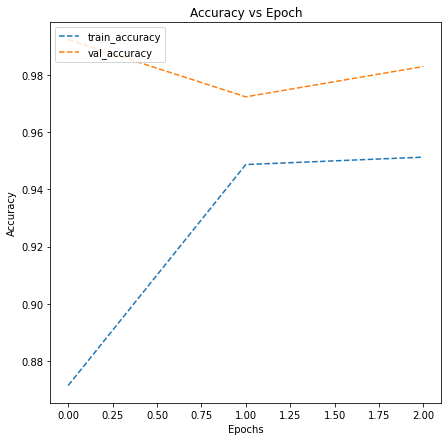

In [ ]:
# plotting the accuracies
plot_accuracy(history2)

####<b>Evaluating the model

In [ ]:
# Evaluate the model to calculate the accuracy
accuracy = model2.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 9ms/step - loss: 0.1810 - accuracy: 0.9477

 Test_Accuracy:- 0.947692334651947


**Model Observations:**<br>
Another CNN model, but this time it has LeakyReLU activation function and Batch Normalization. <br>It took significantly longer than the other 2 models, while the accuracy (95.3%) is also lower than the second model. <br> The fit also seems to be worse. This model is not worth it when compared to the previous one. <br> The accuracy might be good and seem life saving, but the fit is not as good and could cause issues.

<b> Generate the classification report and confusion matrix 

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1300
           1       0.98      0.92      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



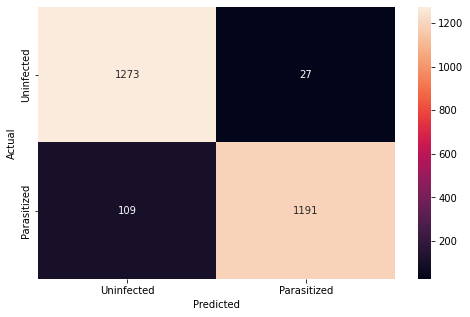

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

- The second model is already very strong.
- However, it could be more robust. In real life applications, images might be rotated. We need to take that into account.
- Data augmentation along with a model similar to our second one might prove to be a very strong and robust solution for real life use cases.
- This could be lifesaving.



###<b>Model 3 with Data Augmentation

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

####<b> Using image data generator

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images

train_datagen = ImageDataGenerator(horizontal_flip=True, 
                                  zoom_range = 0.5, rotation_range=30)
val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = train_images, y = train_labels, batch_size=64, seed=42, shuffle=True)     

# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x= test_images, y = test_labels, batch_size=64, seed=42, shuffle=True)

####<B>Visualizing Augmented images

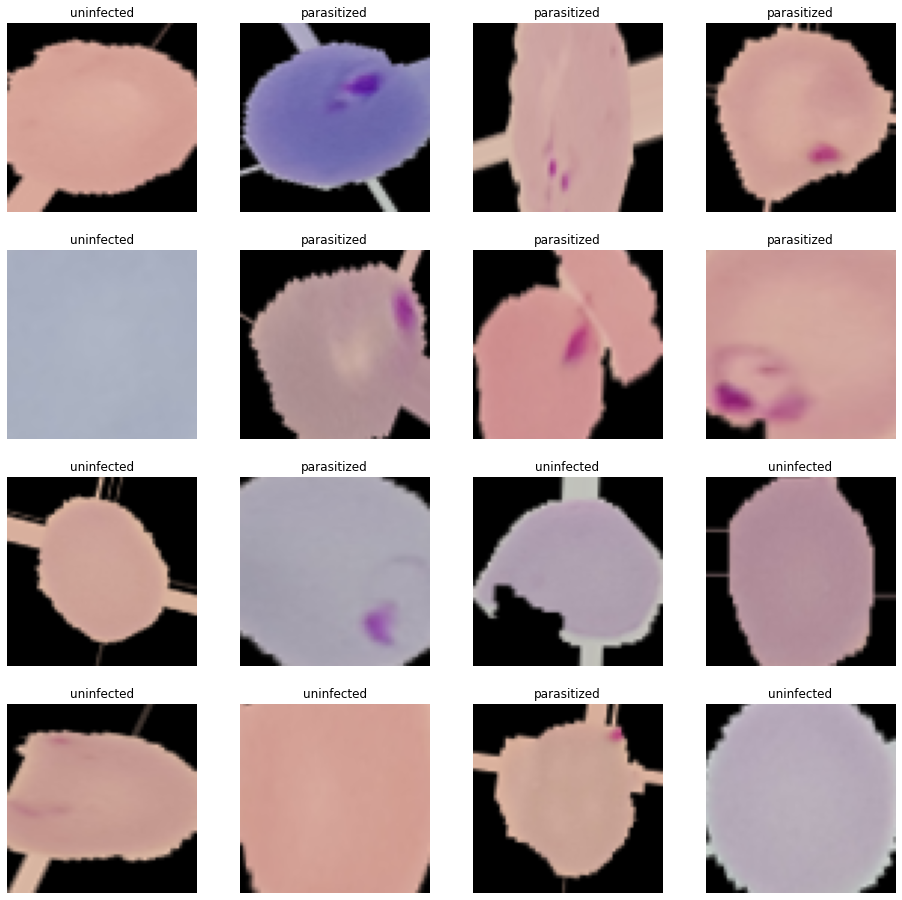

In [ ]:
#Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

#Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))
fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label[1] == 1: 
        ax.set_title('parasitized')
    else:
        ax.set_title('uninfected')
    ax.axis('off')

#####<b>Observations and insights: 
- We have a lot of different image transformations.
- However, the uninfected and parasitized patients are still very easy to distinguish.
- We already had very high accuracy, this can help us build a very robust model

####<b>Building the Model

In [ ]:
model3 = Sequential()

# Build the model here
model3.add(Conv2D(filters=64, kernel_size=2,padding="same",activation="relu",input_shape=(64,64,3)))
model3.add(MaxPooling2D(pool_size=2))
#model3.add(BatchNormalization())

model3.add(Dropout(0.2))

model3.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model3.add(MaxPooling2D(pool_size=2))
#model3.add(BatchNormalization())

model3.add(Dropout(0.2))

model3.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model3.add(MaxPooling2D(pool_size=2))
#model3.add(BatchNormalization())

model3.add(Dropout(0.2))

model3.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model3.add(MaxPooling2D(pool_size=2))
#model3.add(BatchNormalization())

model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(512,activation="relu"))
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dropout(0.4))
model3.add(Dense(2,activation="softmax"))#2 represent output layer neurons 

# use this as the optimizer
adam = optimizers.Adam(learning_rate=0.001)

model3.compile(loss="binary_crossentropy", optimizer=adam, metrics = ['accuracy'])
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b> Fit and Train the model

In [ ]:
history3 = model3.fit(train_generator, 
                                  validation_data=val_generator,
                                  batch_size=32,callbacks=callbacks,
                                  epochs=20,verbose=1)

Epoch 1/20
390/390 [==============================] - 31s 78ms/step - loss: 0.5091 - accuracy: 0.7217 - val_loss: 0.2009 - val_accuracy: 0.9454
Epoch 2/20
390/390 [==============================] - 30s 77ms/step - loss: 0.2550 - accuracy: 0.9096 - val_loss: 0.1981 - val_accuracy: 0.9488
Epoch 3/20
390/390 [==============================] - 30s 77ms/step - loss: 0.2405 - accuracy: 0.9187 - val_loss: 0.1733 - val_accuracy: 0.9431
Epoch 4/20
390/390 [==============================] - 30s 76ms/step - loss: 0.2263 - accuracy: 0.9248 - val_loss: 0.1700 - val_accuracy: 0.9469
Epoch 5/20
390/390 [==============================] - 30s 78ms/step - loss: 0.2229 - accuracy: 0.9256 - val_loss: 0.1560 - val_accuracy: 0.9515
Epoch 6/20
390/390 [==============================] - 30s 77ms/step - loss: 0.2161 - accuracy: 0.9286 - val_loss: 0.1583 - val_accuracy: 0.9500
Epoch 7/20
390/390 [==============================] - 30s 77ms/step - loss: 0.2149 - accuracy: 0.9269 - val_loss: 0.1636 - val_accuracy:

####<B>Evaluating the model

<b>Plot the train and validation accuracy

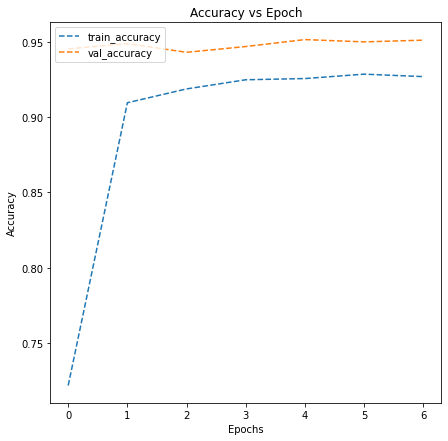

In [ ]:
# plotting the accuracies
plot_accuracy(history3)

In [ ]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 1s 6ms/step - loss: 0.1636 - accuracy: 0.9512

 Test_Accuracy:- 0.9511538743972778


<B>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1300
           1       0.97      0.94      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



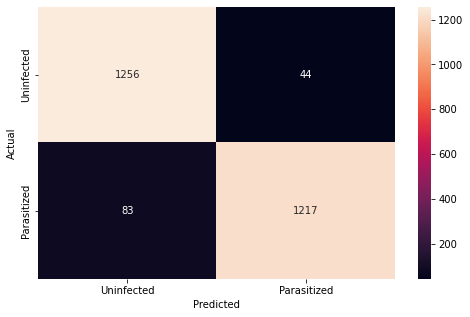

In [ ]:
pred = model3.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Model Observations:**
The next model is very similar to the second model, but also includes data augmentation to be more robust. <br>It has an accuracy of 95.34%, slightly lower than the second model, but it took significantly longer than the other 3. However, the difference in accuracy is so small it can be depreciated, and this model is more robust. <br> It also has one less (73/1300) false negative than the second model. <br> If computational cost is not an issue (in this case it is not, as we want to focus on building the most accurate and robust model possible), this model could be the best one so far. The fit is decent as well.


<b> Now let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**

In [ ]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top=False, weights='imagenet', input_shape=(64,64,3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable=False

# Add classification layers on top of it  
 
x = Flatten()(transfer_layer.output) #Flatten the output from the 3rd block of the VGG16 model
x = Dense(256, activation='relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons

x = BatchNormalization()(x)
pred = Dense(2, activation='softmax')(x)

model4 = Model(vgg.input, pred) #Initializing the model

####<b>Compiling the model

In [ ]:
# Compiling the model 
adam = optimizers.Adam(learning_rate=0.001)

model4.compile(loss="binary_crossentropy", optimizer=adam, metrics = ['accuracy'])

<b> using callbacks

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

<b>Fit and Train the model

In [ ]:
#Fitting the model and running the model for 10 epochs
history4 = model4.fit(train_images, train_labels,batch_size=32,callbacks=callbacks,epochs=10, validation_split=0.4, verbose=1)

Epoch 1/10
468/468 [==============================] - 16s 31ms/step - loss: 0.2481 - accuracy: 0.9054 - val_loss: 0.2218 - val_accuracy: 0.9233
Epoch 2/10
468/468 [==============================] - 13s 27ms/step - loss: 0.1701 - accuracy: 0.9371 - val_loss: 0.5414 - val_accuracy: 0.7921
Epoch 3/10
468/468 [==============================] - 14s 29ms/step - loss: 0.1585 - accuracy: 0.9403 - val_loss: 0.0858 - val_accuracy: 0.9816
Epoch 4/10
468/468 [==============================] - 13s 28ms/step - loss: 0.1520 - accuracy: 0.9422 - val_loss: 0.1937 - val_accuracy: 0.9386
Epoch 5/10
468/468 [==============================] - 13s 29ms/step - loss: 0.1466 - accuracy: 0.9418 - val_loss: 0.2491 - val_accuracy: 0.9266


<b>Plot the train and validation accuracy

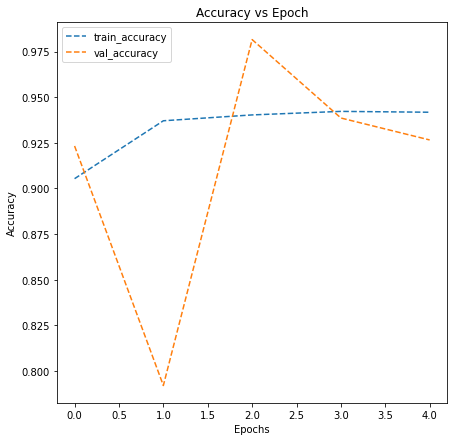

In [ ]:
# plotting the accuracies
plot_accuracy(history4)

#####**Observations and insights:**
- The fit is very poor. Validation accuracy is extremely noisy.
- The pre-trained model has an accuracy of 91%, while also being computationally expensive and having a very bad fit, with a noisy validation accuracy. This model is not as good as the second or fourth.
- Accuracy is not as high, model is noisy, and last graph shows us a very bad fit. This model is not worth implementing and could be dangerous in real life applications.


####<b> Evaluating the model

In [ ]:
# Evaluating the model on test data
accuracy4=model4.evaluate(test_images, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy4[1])

82/82 [==============================] - 2s 22ms/step - loss: 0.2093 - accuracy: 0.9258

 Test_Accuracy:- 0.9257692098617554


<b>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1300
           1       0.92      0.93      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600



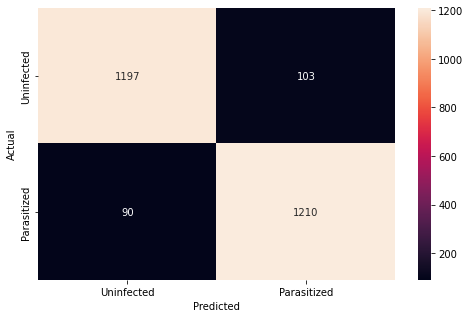

In [ ]:
# Plot the confusion matrix and generate a classification report for the model
pred = model4.predict(test_images)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

- As explained before, the fourth model was the best model: almost as precise as the second one, while having less costly errors (not as many false positives) and being more robust thanks to data augmentation. 
- The second model was slightly more accurate, but had more false negatives which is more costly. It is also less robust against rotation and others, which will show up in real life situations.
- 95% accuracy can provide extreme medical value when working in unison with healthcare professionals.

###<b>Extra. Model 5: Model using image histograms

As seen in the first milestone and the data exploration, the red cells from patients with malaria have a dark/purple tint somewhere on their cell. On the other hand, healthy patients have a uniform, lighter color on the entirety of the image.
<br>Thanks to this, we can extract useful characteristics from healthy and parasatized patients.
<br>An image is nothing more than a numeric tensor. If we take the average of each pixel's R, G, and B value, we can get the pixel intensity. 
<br>We can then get the image histogram: which is a plot of intensity vs number of pixels.
<br>Parasatized patients should have different histograms than healthy patients.
This gives us a very easy to interpret difference between healthy and not healthy patients. We can then feed this information to a Neural Network Model to evaluate its performance. 

**Let's explore the grayscale (contrast) histogram of infected and healthy patients**

In [ ]:
from PIL import Image
train_histograms=[]
test_histograms=[]
#Pillow can obtain the image histogram very easily. Need to convert image to pillow image
#Pillow needs an array which is not normalized and as np.uint8 type...
for image in train_images:
  #convert to pillow image, and to grayscale
  new_image=Image.fromarray((image*255).astype(np.uint8)).convert("L")
  hist=new_image.histogram()
  hist=np.array(hist)
  hist=(hist/(64*64)).astype("float32")
  train_histograms.append(hist)
  #normalize, out of 768 possible values
#do the same for test data
for image in test_images:
  #convert to pillow image...
  new_image=Image.fromarray((image*255).astype(np.uint8)).convert("L")
  hist=new_image.histogram()
  hist=np.array(hist)
  hist=(hist/(64*64)).astype("float32")
  test_histograms.append(hist)
train_histograms=np.array(train_histograms)
test_histograms=np.array(test_histograms)
print(train_histograms.shape, test_histograms.shape)


(24958, 256) (2600, 256)


256
256


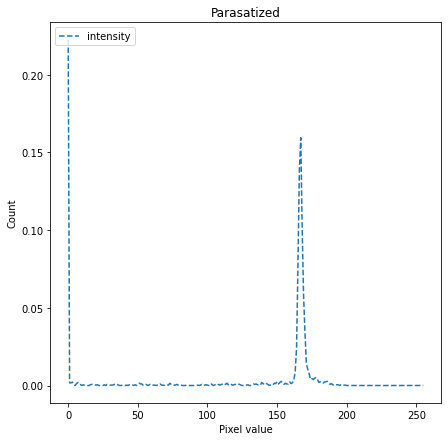

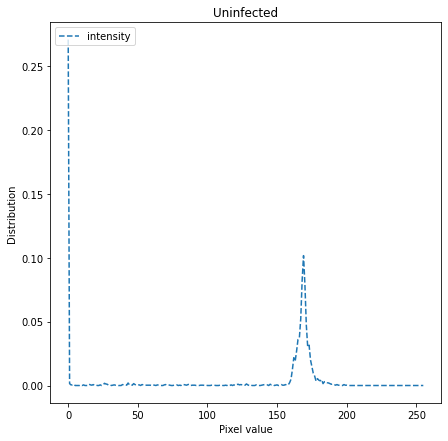

In [ ]:
#Lets plot the histograms of an infected patient and a healthy patient
patient1=train_histograms[0]
N = len(patient1)
print(N)
plt.figure(figsize=(7,7))
plt.plot(np.arange(0, N), patient1, label="intensity", ls='--')
plt.title("Parasatized")
plt.xlabel("Pixel value")
plt.ylabel("Count")
plt.legend(loc="upper left")

patient2=train_histograms[24000]
N = len(patient2)
print(N)
plt.figure(figsize=(7,7))
plt.plot(np.arange(0, N), patient2, label="intensity", ls='--')
plt.title("Uninfected")
plt.xlabel("Pixel value")
plt.ylabel("Distribution")
plt.legend(loc="upper left")

[1 1 1 ... 0 0 0]


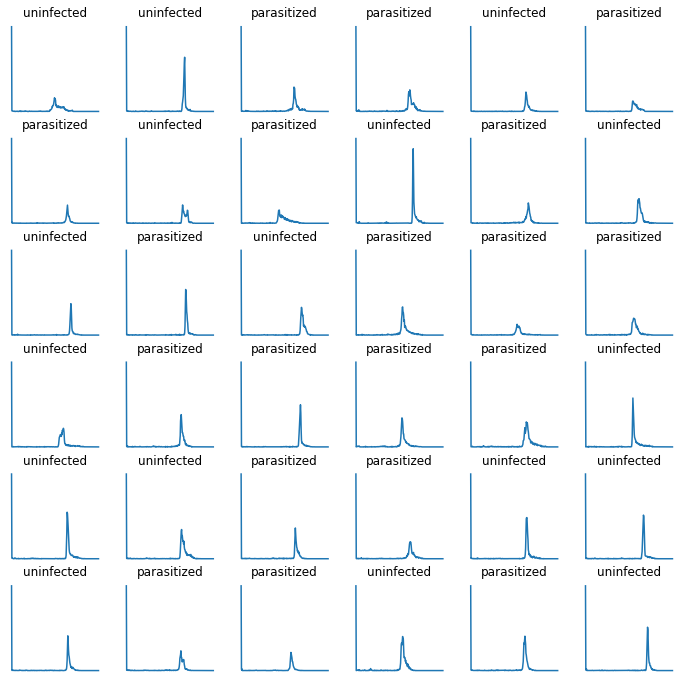

In [ ]:

np.random.seed(42)
plt.figure(1 , figsize = (12 , 12))
print(original_train_labels)
for n in range(1, 37):
    plt.subplot(6, 6, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if original_train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.plot(np.arange(0,256), train_histograms[index])
    plt.axis('off')

**Since this is a 1d array, we can feed it to an ANN**

In [ ]:
modelANN = Sequential() 
modelANN.add(Dense(256, activation='relu', input_shape=(256,))) #first
modelANN.add(Dense(128, activation='relu')) #second
modelANN.add(Dropout(0.2)) #dropout
modelANN.add(Dense(64, activation='relu')) #third
modelANN.add(Dense(64, activation='relu')) #fourth
modelANN.add(Dense(32, activation='relu')) #fifth
modelANN.add(BatchNormalization()) #batch
modelANN.add(Dense(2, activation='softmax'))
adam = optimizers.Adam(learning_rate=0.0005)  
#compile the modelANN
modelANN.compile(optimizer=adam, loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
historyANN=modelANN.fit(train_histograms, train_labels, batch_size=128, epochs=20, verbose=1, validation_split=0.2, callbacks=callbacks)

Epoch 1/20
156/156 [==============================] - 2s 6ms/step - loss: 0.6021 - accuracy: 0.6784 - val_loss: 0.8593 - val_accuracy: 0.0000e+00
Epoch 2/20
156/156 [==============================] - 1s 5ms/step - loss: 0.3713 - accuracy: 0.8429 - val_loss: 0.9095 - val_accuracy: 0.1737
Epoch 3/20
156/156 [==============================] - 1s 6ms/step - loss: 0.2952 - accuracy: 0.8793 - val_loss: 0.4812 - val_accuracy: 0.8147
Epoch 4/20
156/156 [==============================] - 1s 5ms/step - loss: 0.2730 - accuracy: 0.8905 - val_loss: 0.3971 - val_accuracy: 0.8341
Epoch 5/20
156/156 [==============================] - 1s 5ms/step - loss: 0.2595 - accuracy: 0.8990 - val_loss: 0.5550 - val_accuracy: 0.7450
Epoch 6/20
156/156 [==============================] - 1s 5ms/step - loss: 0.2495 - accuracy: 0.9027 - val_loss: 0.2315 - val_accuracy: 0.9149
Epoch 7/20
156/156 [==============================] - 1s 5ms/step - loss: 0.2433 - accuracy: 0.9053 - val_loss: 0.3021 - val_accuracy: 0.8912
Ep

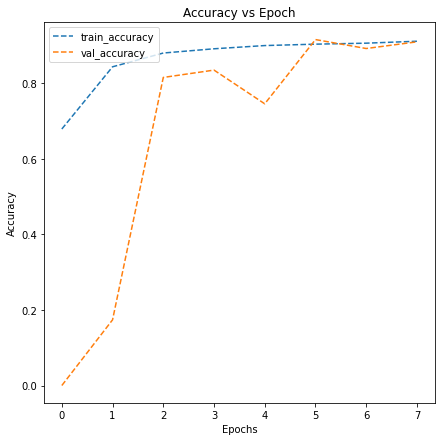

In [ ]:
plot_accuracy(historyANN)

In [ ]:
accuracyANN = modelANN.evaluate(test_histograms, test_labels, verbose=1)
print('\n', 'Test_Accuracy:-', accuracyANN[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.2662 - accuracy: 0.9038

 Test_Accuracy:- 0.9038461446762085


              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1300
           1       0.91      0.89      0.90      1300

    accuracy                           0.90      2600
   macro avg       0.90      0.90      0.90      2600
weighted avg       0.90      0.90      0.90      2600



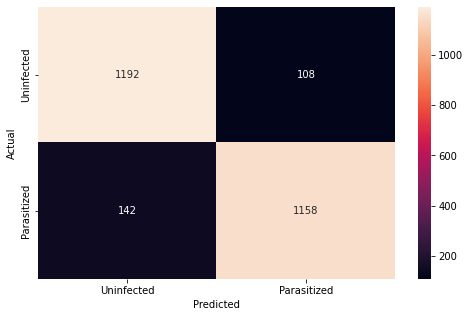

In [ ]:
# Plot the confusion matrix and generate a classification report for the model
pred = modelANN.predict(test_histograms)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_labels,axis = 1)
#Printing the classification report
print(classification_report(y_true,pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true,pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Model Observations:**
This model transforms all the images into an intensity histogram, so it will focus on different features and will receive different inputs than every previous model. <br>

The high distribution at pixel 0 is due to the black corners in every image. This model was extremely fast compared to all others, taking fewer parameters into account. It still had a test accuracy of 90%, and a very good fit. <br> This model could be very good if cost was an issue or limitant, but since the aim is to have as high an accuracy as possible and a robust model, the fourth model is the best one.


###<b> Observations and Conclusions drawn from the final model: 



**Improvements that can be done:**<br>
- A possible improvement is ensemble learning.
- The sixth model interprets the data as an intensity histogram thanks to DIP techniques, it focuses on image contrast to predict in a quick but accurate manner.
- Meanwhile, the chosen model uses CNN filters to find relevant features on the image itself for classification. Both of these models have very different strengths and focus on different things.
- Because of this, they could be complementary and could possibly be used together in an ensemble learning model.

###<b>Insights

### **Insights**

####**Refined insights**:
- As seen in the previous milestone, red blood cells of patients infected with malaria, had purple/dark stains on certain parts of their cells.
- These stains could be anywhere on the cell, which is why we need to build a model that considers spatial localities and is translationally invariant. 
- CNNs can be very good for this problem as they cover both of these requirements. CNNs can also be better for reducing the number of features taken into account by the feed forward neural network, instead of feeding the entirety of an image into it.
- Errors are very costly with this data: false negatives (diagnosing a patient with malaria as healthy) can cost someone their life. Meanwhile false positives can be costly to the patients, doctors and be risky due to unneeded medication side effects.
- Data augmentation could be very useful, as CNNs do not consider image rotation and we can’t guarantee that every image will be in the same orientation. We want to build a model as robust as possible. Transfer learning can also be very helpful for this and deserves to be explored.
- Some other methods that do not require CNNs could be explored. The stains are very dark, so they could easily be identified by image contrast. We could convert the image to an intensity histogram, and infected cells should have a bigger peak/distribution in darker pixels which would represent the stains. Meanwhile, most healthy cells would look the same on an intensity histogram, and would be very similar to infected cells in every pixel intensity except for the ones representing the stain.
- If we have the intensity histogram, we can feed this into an Artificial Neural Network for a faster and more efficient model, which is also easier to interpret. However, this would come at a cost to the model’s accuracy.
- Since the problem is related to saving lives and scientific/medical value, computational cost is not as relevant as in other problems: we want to focus on high accuracy over everything else. However, other alternatives are still worth exploring.
- 100% accuracy is close to impossible without overfitting. This is okay, as the main aim is a good fit and the model is not aiming to completely replace manual methods, but rather work in unison to them. Manual methods have a higher failure rate, and the model will not be perfect. However, with the help of this model, a doctor can diagnose a patient with malaria, and then use the model to have more security in their decision. If a doctor ever makes a mistake, the model will let them know so they can double check. If the model makes a mistake, the doctor’s experience can be complementary to assure no lives are harmed.
- The model can bring significant medical value and save lives, as long as its accuracy is high (over 90%). Reaching 95% accuracy would be considered a success and provide significant medical value.

####**Comparison of various techniques and their relative performance**:
- As explained before, the fourth model was the best model: almost as precise as the second one, while having less costly errors (not as many false positives) and being more robust thanks to data augmentation. 
- As explained before: second model has highest accuracy, and time cost is not as big of a consideration as accuracy for this problem as we want to focus on saving/helping as many lives as possible. Fifth model has a bad fit and accuracy. First and third, are not as good as second model. Fourth model has almost the same accuracy as first, while having less costly errors but being more robust thanks to data augmentation. This will prove more useful during real life applications where images might be rotated. Because of this, fourth model is chosen.
- The current chosen model (fourth model in previous section) is very robust thanks to data augmentation, has a good fit and over 95% accuracy. As seen at the start of this document, this is very good and can provide significant medical value. It can help doctors/laboratory analysts have more security in their decisions, and can work in unison with them to save lives.


####**Proposal for the final solution design**:
- The chosen model is the fourth one, as it is very precise (almost as precise as the second model), while having less costly errors, a very good fit and being more robust thanks to data augmentation.
- Its over 95% accuracy can provide substantial medical value and, when used in unison with doctors, can help save lives.
- This is the chosen solution, but it could possibly be further improved with ensemble learning when joined with the sixth, ANN based model.